<a href="https://colab.research.google.com/github/lasentia/Analysis_of_card_dropout_rates_project/blob/main/2%ED%8C%80_2%EC%A1%B0/hyunalim/%EC%86%8C%EB%93%9D%EC%88%98%EC%A4%80%EA%B3%BC%EC%9D%B4%ED%83%88%EC%9C%A8%EC%9D%98%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
#결측치 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#중복 데이터 확인하기
df.duplicated().sum()

0

###EDA진행하기

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

####이탈한 고객과 유지 고객 비율 시각화

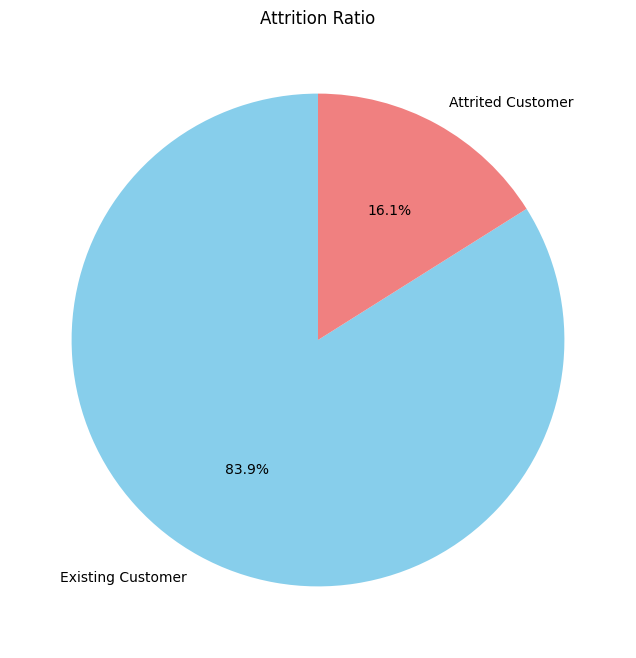

In [ ]:
#전체 고객의 이탈율 구하기
df['Attrition_Flag'].value_counts()
attrition_ratio = df['Attrition_Flag'].value_counts(normalize=True)

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(attrition_ratio, labels=attrition_ratio.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Attrition Ratio')
plt.show()

####소득수준 분포 시각화

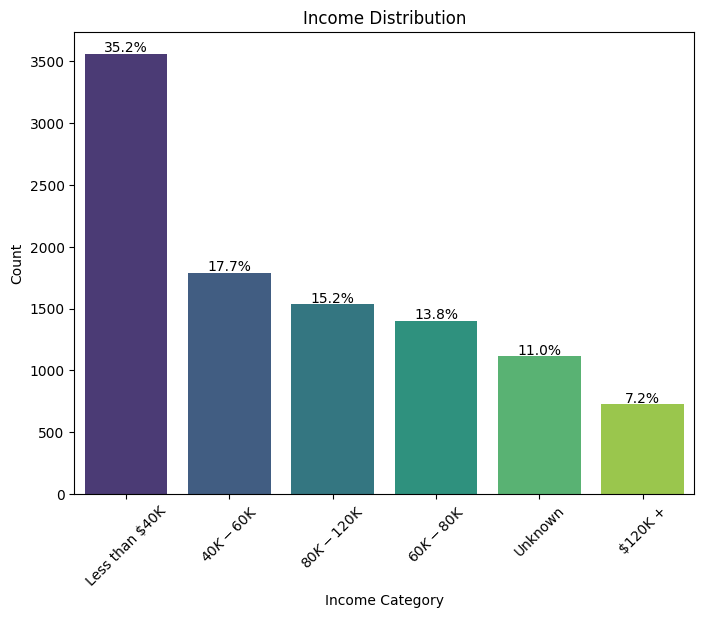

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Income_Category', data=df, palette='viridis', order=df['Income_Category'].value_counts().index)

# 각 막대 위에 텍스트 표시 (비율로)
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / total_count) * 100
    ax.text(patch.get_x() + patch.get_width() / 2,
            height + 15,
            f'{percentage:.1f}%',
            ha='center')

plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

####이탈 고객의 소득수준 시각화

In [ ]:
#필요한 컬럼으로만 구성된 데이터프레임 만들기
cols=['Attrition_Flag','Income_Category', 'Total_Trans_Amt', 'Total_Trans_Ct']
cust_df = pd.read_csv('BankChurners.csv', usecols=cols)
cust_df[200:600]

,Attrition_Flag,Income_Category,Total_Trans_Amt,Total_Trans_Ct
200,Existing Customer,$80K - $120K,1777,42
201,Existing Customer,$60K - $80K,1302,27
202,Existing Customer,$80K - $120K,1483,41
203,Existing Customer,$60K - $80K,1060,27
204,Existing Customer,$60K - $80K,1330,32
...,...,...,...,...
595,Existing Customer,$80K - $120K,1755,54
596,Attrited Customer,$60K - $80K,804,15
597,Existing Customer,$60K - $80K,1196,30
598,Attrited Customer,Less than $40K,850,22


In [ ]:
# "Attrition_Flag" 값이 "Attrited Customer"인 행 선택
attrited_cust = cust_df['Attrition_Flag']=='Attrited Customer'
Attrition_df = cust_df[attrited_cust]
Attrition_df.head()

,Attrition_Flag,Income_Category,Total_Trans_Amt,Total_Trans_Ct
21,Attrited Customer,Less than $40K,692,16
39,Attrited Customer,Unknown,704,16
51,Attrited Customer,Less than $40K,705,19
54,Attrited Customer,$120K +,602,15
61,Attrited Customer,$60K - $80K,691,15


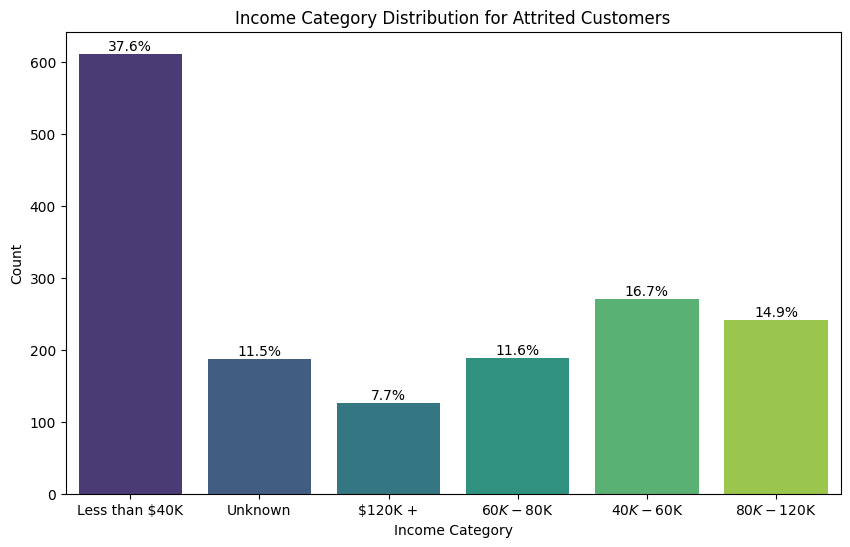

In [ ]:
# 이탈 고객의 "Income_Category"를 시각화
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Income_Category', data=Attrition_df, palette='viridis')
# 각 범주의 비율을 표시
total_count = len(Attrition_df)
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / total_count) * 100
    ax.text(patch.get_x() + patch.get_width() / 2,
            height + 5,
            f'{percentage:.1f}%',
            ha='center')

plt.title('Income Category Distribution for Attrited Customers')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

####유지 고객의 소득 수준 시각화

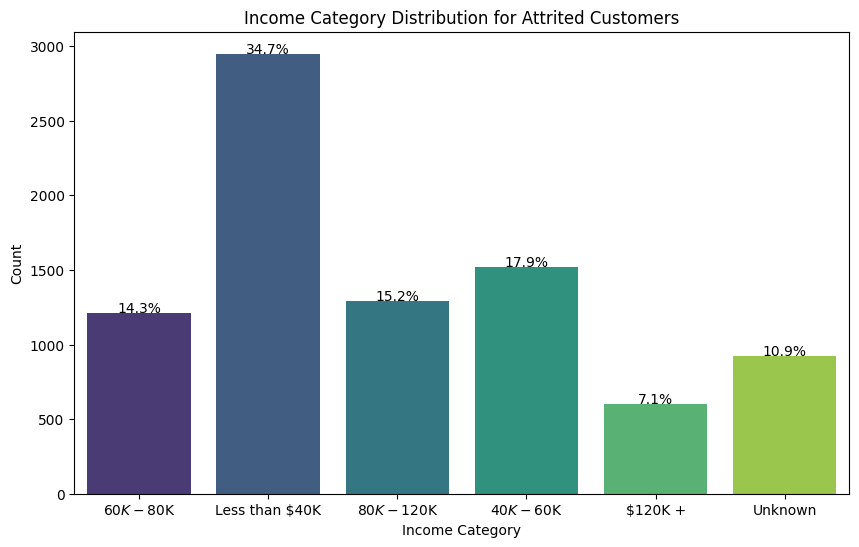

In [ ]:
#이탈하지 않은 고객들의 Income category 시각화
existing_cust= df['Attrition_Flag']=='Existing Customer'
existing_df = df[existing_cust]

plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Income_Category', data=existing_df, palette='viridis')
# 각 범주의 비율을 표시
total_count = len(existing_df)
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / total_count) * 100
    ax.text(patch.get_x() + patch.get_width() / 2,
            height + 5,
            f'{percentage:.1f}%',
            ha='center')

plt.title('Income Category Distribution for Existing Customers')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

###소득수준과 이탈율의 상관관계
p값이 0.025 로 일반적인 유의수준인 0.05 값보다 작음.p-value가 특정 유의수준보다 작으면 두 변수 간에는 통계적으로 유의한 상관관계가 있다고 볼 수 있다.

In [ ]:
from scipy.stats import chi2_contingency

# 교차표 생성
cross_tab = pd.crosstab(cust_df['Income_Category'], cust_df['Attrition_Flag'])

# 카이제곱 검정
chi2, p, _, _ = chi2_contingency(cross_tab)

print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

Chi-square statistic: 12.832259274756895
p-value: 0.025002425704390617


1. 이탈율과 상관관계가 있는 컬럼들을 변수로 설정하고 회귀분석 -> 어떤 변수별 영향력 측정
2. 유의미한 변수를 활용해 이탈여부 예측하기

###이탈여부 예측하기
Accuracy(정확도): 0.84
혼동행렬과 분류보고서를 참고하였을 때 해당 모델은 불균형한 데이터에 대응하지 못하고 있음.

In [ ]:
cols= ['Attrition_Flag','Income_Category']
df = pd.read_csv('BankChurners.csv', usecols=cols)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 범주형 변수를 수치형으로 변환
le = LabelEncoder()
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

# 특성과 타겟 분리
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.84

Confusion Matrix:
[[   0  327]
 [   0 1699]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
